###  Installing necessary packages

In [0]:
# Installing fuzzy matching package
%pip install rapidfuzz

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
from pyspark.sql.functions import *
from pyspark.sql import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading data

In [0]:
job_listenings_df = spark.read.format('csv')\
                                .option('header',True)\
                                .option('inferSchema',True)\
                                .option('multiLine',True)\
                                .load("dbfs:/FileStore/tables/combined_job_listenings.csv")

In [0]:
display(job_listenings_df.limit(10))

Job Title,Company,Location,No. of Openings,Job Level,Salary,Experience,Job URL,Job Description
कार्यालय सहायक,Contractor's Association of Kathmandu Valley,Location not found,Not found,Not found,Not found,Not found,https://merojob.com/-5245/,Not found
Academic Staff,Sparkle Kids Academy,"Manbhawan, Lalitpur, Nepal",1,Mid level,Negotiable,Less Than or Equal To 1 year,https://www.vocalpanda.com/academic-staff-5657,"Plan and conduct engaging learning activities for young children. Create a nurturing and supportive classroom environment. Develop lesson plans and teaching materials as per the curriculum. Assess students' progress and provide constructive feedback. Maintain discipline and ensure a safe learning space. Communicate effectively with parents and guardians regarding student development. Adapt teaching methods to meet individual student needs. Work collaboratively with other staff and follow school policies. Female candidate, age below 30 years. Bachelor’s or Master’s degree (Education-related field preferred). At least 1 year of experience in any school. Montessori training is highly preferred. Strong English proficiency with excellent communication skills. Ability to work well with children and understand their needs. Versatile, smart, and positive personality. Unmarried status preferred."
Account Assistant,Sagarmatha Engineering College,"Sanepa, Lalitpur",[ 1 ],Mid Level,Not Disclosed,More than or equal to 1 year,https://merojob.com/account-assistant-340/,"Compile and analyze account related information to prepare monthly, quarterly and annual report/statement as per the college's requirement.Ensure and maintain accounting systems and records in compliance with accepted policies and be prepared for internal and external audit as and when required.Be updated and inform all concerned in the organization about the latest regulations and policies related to applicable Tax and VAT and maintain system accordingly.Coordinate with related government line agencies and regulatory bodies for the smooth operation of Account/Finance Department.Receive fee from students and maintain students' fee accounts and coordinate with parents/guardian of students to ensure timely collection of fee/due fee.Prepare and submit daily, weekly, monthly and yearly fee collection details/report with necessary feedback, suggestions and recommendations.Be responsible for obtaining employees' and organizations' tax clearance certificate as and when required.Work flexibly and efficiently, maintain the highest level of professionalism, be instrumental to promote and implement the policies of the College.Maintain a high level of confidentiality of information in your work at all times.Work pro-actively to forward the success and vision of the College.Attend meetings and maintain regular communication with the line manager by submitting regular report.In addition to the above duties, you are required to assist the administration in planning the academic and administrative developmental activities and implementation of the same effectively."
Account Assistant,Mokshya,"Khumaltar, Lalitpur",[ 1 ],Mid Level,Not Disclosed,More than 1 year,https://merojob.com/account-assistant-339/,"Assist in maintaining accurate financial records and ensure all transactions are properly recorded.Prepare and process invoices, receipts, and payments.Reconcile bank statements, accounts payable, and accounts receivable.Assist in preparing monthly, quarterly, and annual financial reports.Help with budgeting and forecasting activities.Assist with payroll processing and ensure timely payment.Handle office documentation, filing, and organizing accounting records."
Account Officer,Lomus Digital,"Gairidhara, Subarna Shamsher Marg",[ 1 ],Senior Level,Not Disclosed,More than 3 years,https://merojob.com/account-officer-721/,"Document financial transactions by analysing documents and raising vouchers along the knowledge of taxation systems.Preparation of vouchers and entry into the system whil

### Transformation

In [0]:
job_listenings_df = job_listenings_df.withColumnRenamed('No. of Openings','No of Openings')

In [0]:
display(job_listenings_df.count())

734

In [0]:
job_listenings_df = job_listenings_df.dropDuplicates()

In [0]:
display(job_listenings_df.count())

528

In [0]:
#Checking Null values
display(job_listenings_df.select([sum(col(c).isNull().cast('int')).alias(c) for c in job_listenings_df.columns]))

Job Title,Company,Location,No of Openings,Job Level,Salary,Experience,Job URL,Job Description
0,0,0,0,0,0,0,0,0


In [0]:
#For Hardcoded null
display(job_listenings_df.select([sum((col(c)=='null').cast('int')) for c in job_listenings_df.columns]))

sum(CAST((Job Title = null) AS INT)),sum(CAST((Company = null) AS INT)),sum(CAST((Location = null) AS INT)),sum(CAST((No of Openings = null) AS INT)),sum(CAST((Job Level = null) AS INT)),sum(CAST((Salary = null) AS INT)),sum(CAST((Experience = null) AS INT)),sum(CAST((Job URL = null) AS INT)),sum(CAST((Job Description = null) AS INT))
0,0,0,0,0,0,0,0,0


In [0]:
job_listenings_df = job_listenings_df.select([trim(col(c)).alias(c) for c in job_listenings_df.columns])
display(job_listenings_df.limit(10))

Job Title,Company,Location,No of Openings,Job Level,Salary,Experience,Job URL,Job Description
Academic Staff,Sparkle Kids Academy,"Manbhawan, Lalitpur, Nepal",1,Mid level,Negotiable,Less Than or Equal To 1 year,https://www.vocalpanda.com/academic-staff-5657,"Plan and conduct engaging learning activities for young children. Create a nurturing and supportive classroom environment. Develop lesson plans and teaching materials as per the curriculum. Assess students' progress and provide constructive feedback. Maintain discipline and ensure a safe learning space. Communicate effectively with parents and guardians regarding student development. Adapt teaching methods to meet individual student needs. Work collaboratively with other staff and follow school policies. Female candidate, age below 30 years. Bachelor’s or Master’s degree (Education-related field preferred). At least 1 year of experience in any school. Montessori training is highly preferred. Strong English proficiency with excellent communication skills. Ability to work well with children and understand their needs. Versatile, smart, and positive personality. Unmarried status preferred."
Account Assistant,Sagarmatha Engineering College,"Sanepa, Lalitpur",[ 1 ],Mid Level,Not Disclosed,More than or equal to 1 year,https://merojob.com/account-assistant-340/,"Compile and analyze account related information to prepare monthly, quarterly and annual report/statement as per the college's requirement.Ensure and maintain accounting systems and records in compliance with accepted policies and be prepared for internal and external audit as and when required.Be updated and inform all concerned in the organization about the latest regulations and policies related to applicable Tax and VAT and maintain system accordingly.Coordinate with related government line agencies and regulatory bodies for the smooth operation of Account/Finance Department.Receive fee from students and maintain students' fee accounts and coordinate with parents/guardian of students to ensure timely collection of fee/due fee.Prepare and submit daily, weekly, monthly and yearly fee collection details/report with necessary feedback, suggestions and recommendations.Be responsible for obtaining employees' and organizations' tax clearance certificate as and when required.Work flexibly and efficiently, maintain the highest level of professionalism, be instrumental to promote and implement the policies of the College.Maintain a high level of confidentiality of information in your work at all times.Work pro-actively to forward the success and vision of the College.Attend meetings and maintain regular communication with the line manager by submitting regular report.In addition to the above duties, you are required to assist the administration in planning the academic and administrative developmental activities and implementation of the same effectively."
कार्यालय सहायक,Contractor's Association of Kathmandu Valley,Location not found,Not found,Not found,Not found,Not found,https://merojob.com/-5245/,Not found
Account Officer,Lomus Digital,"Gairidhara, Subarna Shamsher Marg",[ 1 ],Senior Level,Not Disclosed,More than 3 years,https://merojob.com/account-officer-721/,"Document financial transactions by analysing documents and raising vouchers along the knowledge of taxation systems.Preparation of vouchers and entry into the system while complying with government policy by studying existing and new legislation.Enforcing adherence to requirements and advising management on needed actions.Handle general account queries, check invoices for inaccuracies and budgeting, finance, planning, handling tax matters and annual budget preparation.Prepares special financial reports by collecting, analysing and summarising account information and trends.Contact clients about invoices that are past due while maintaining records of business costs, such as labour & material.Payable management and scheduling."
Account Officer,Classic Tech Pvt.Ltd,"New

In [0]:
#Cleaning different columns values
job_listenings_df = job_listenings_df.withColumn(
    "Location",
    trim(
        regexp_replace(
            regexp_replace(
                regexp_replace(col("Location"), r"[\r\n]+", " "),  # remove newlines
                r"\s*,\s*", ", "                                   # normalize comma spacing
            ),
            r"\s+", " "                                            # collapse extra spaces
        )
    )
).withColumn(
    "Salary",
    trim(
        regexp_replace(
            regexp_replace(
                regexp_replace(col("Salary"), r"[\r\n]+", " "),    
                r"\s*,\s*", ", "                                   
            ),
            r"\s+", " "                                            
        )
    )
).withColumn(
    "No of Openings",
    trim(
        regexp_replace(
            regexp_replace(
                regexp_replace(
                    regexp_replace(col("No of Openings"), r"[\[\]]", ""),  # remove [ and ]
                    r"[\r\n]+", ""                                            # remove line breaks
                ),
                r"\s*,\s*", ","                                               
            ),
            r"\s+", ""                                                      
        )
    )
)
display(job_listenings_df.limit(10))

Job Title,Company,Location,No of Openings,Job Level,Salary,Experience,Job URL,Job Description
Academic Staff,Sparkle Kids Academy,"Manbhawan, Lalitpur, Nepal",1,Mid level,Negotiable,Less Than or Equal To 1 year,https://www.vocalpanda.com/academic-staff-5657,"Plan and conduct engaging learning activities for young children. Create a nurturing and supportive classroom environment. Develop lesson plans and teaching materials as per the curriculum. Assess students' progress and provide constructive feedback. Maintain discipline and ensure a safe learning space. Communicate effectively with parents and guardians regarding student development. Adapt teaching methods to meet individual student needs. Work collaboratively with other staff and follow school policies. Female candidate, age below 30 years. Bachelor’s or Master’s degree (Education-related field preferred). At least 1 year of experience in any school. Montessori training is highly preferred. Strong English proficiency with excellent communication skills. Ability to work well with children and understand their needs. Versatile, smart, and positive personality. Unmarried status preferred."
Account Assistant,Sagarmatha Engineering College,"Sanepa, Lalitpur",1,Mid Level,Not Disclosed,More than or equal to 1 year,https://merojob.com/account-assistant-340/,"Compile and analyze account related information to prepare monthly, quarterly and annual report/statement as per the college's requirement.Ensure and maintain accounting systems and records in compliance with accepted policies and be prepared for internal and external audit as and when required.Be updated and inform all concerned in the organization about the latest regulations and policies related to applicable Tax and VAT and maintain system accordingly.Coordinate with related government line agencies and regulatory bodies for the smooth operation of Account/Finance Department.Receive fee from students and maintain students' fee accounts and coordinate with parents/guardian of students to ensure timely collection of fee/due fee.Prepare and submit daily, weekly, monthly and yearly fee collection details/report with necessary feedback, suggestions and recommendations.Be responsible for obtaining employees' and organizations' tax clearance certificate as and when required.Work flexibly and efficiently, maintain the highest level of professionalism, be instrumental to promote and implement the policies of the College.Maintain a high level of confidentiality of information in your work at all times.Work pro-actively to forward the success and vision of the College.Attend meetings and maintain regular communication with the line manager by submitting regular report.In addition to the above duties, you are required to assist the administration in planning the academic and administrative developmental activities and implementation of the same effectively."
कार्यालय सहायक,Contractor's Association of Kathmandu Valley,Location not found,Notfound,Not found,Not found,Not found,https://merojob.com/-5245/,Not found
Account Officer,Lomus Digital,"Gairidhara, Subarna Shamsher Marg",1,Senior Level,Not Disclosed,More than 3 years,https://merojob.com/account-officer-721/,"Document financial transactions by analysing documents and raising vouchers along the knowledge of taxation systems.Preparation of vouchers and entry into the system while complying with government policy by studying existing and new legislation.Enforcing adherence to requirements and advising management on needed actions.Handle general account queries, check invoices for inaccuracies and budgeting, finance, planning, handling tax matters and annual budget preparation.Prepares special financial reports by collecting, analysing and summarising account information and trends.Contact clients about invoices that are past due while maintaining records of business costs, such as labour & material.Payable management and scheduling."
Account Officer,Classic Tech Pvt.Ltd,"New Baneshwo

In [0]:
#Dealing with No of Openings Column 
job_listenings_df = job_listenings_df.withColumn(
    'No of Openings',
    when(
    lower(col('No of Openings')).isin(['notmentioned','notfound','notdefined','few']),
    "1"
    ).otherwise(col('No of Openings'))
)


In [0]:
#Matching location column with defined known_locations to standardize location column
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType, ArrayType
from rapidfuzz import fuzz, process

# Known locations
known_locations = ["Kathmandu", "Bhaktapur", "Lalitpur", "Kavrepalanchok", "Sindhupalchok", "Dolakha", "Ramechhap", "Okhaldhunga", 
                   "Solukhumbu", "Khotang", "Bhojpur", "Dhankuta", "Terhathum", "Sankhuwasabha", "Panchthar", "Ilam", "Jhapa", 
                   "Morang", "Sunsari", "Udayapur", "Saptari", "Siraha", "Dhanusha", "Mahottari", "Sarlahi", "Bara", "Parsa", 
                   "Rautahat", "Chitwan", "Makwanpur", "Nuwakot", "Dhading", "Rasuwa", "Sindhuli", "Gorkha", "Lamjung", 
                   "Tanahun", "Kaski", "Manang", "Mustang", "Myagdi", "Parbat", "Baglung", "Gulmi", "Arghakhanchi", 
                   "Palpa", "Nawalpur", "Rupandehi", "Kapilvastu", "Dang", "Pyuthan", "Rolpa", "Rukum East", "Rukum West", 
                   "Salyan", "Banke", "Bardiya", "Surkhet", "Dailekh", "Jajarkot", "Dolpa", "Humla", "Mugu", "Jumla", 
                   "Kalikot", "Achham", "Doti", "Bajura", "Bajhang", "Kailali", "Kanchanpur", "Dadeldhura", "Baitadi", 
                   "Darchula", "Remote", "Nepal", "Pokhara"]

# Fuzzy match UDF
def match_location_fuzzy(location):
    if location is None:
        return "Not defined"
    
    matches = []
    # Split location by comma and lowercase
    parts = [p.strip().lower() for p in location.split(",")]

    for part in parts:
        result, score, _ = process.extractOne(part, known_locations, scorer=fuzz.partial_ratio)
        if score >= 85:
            matches.append(result)
    
    return ", ".join(set(matches)) if matches else "Not defined"

# Register UDF
match_location_udf = udf(match_location_fuzzy, StringType())

# Apply UDF to create standardized location
job_listenings_df = job_listenings_df.withColumn("Standardized Location", match_location_udf(col("Location")))

# Show results
display(job_listenings_df.select("Location", "Standardized Location").limit(10))


Location,Standardized Location
Kathmandu District,Kathmandu
"Chitwan, Kathmandu, Sunsari (Laukahi)","Kathmandu, Sunsari, Chitwan"
"Bishalnagar, Hadigaun Marga, Dhumbarahi, Kathmandu, Kathmandu, Kathmandu District",Kathmandu
Kathmandu,Kathmandu
"Kathmandu, Nepal","Kathmandu, Nepal"
"Khumaltar, Lalitpur, Lalitpur District",Lalitpur
"Kathmandu, Bagmati, Makwanpur District","Kathmandu, Makwanpur"
"Chakrapath, Kathmandu",Kathmandu
"Kathmandu, Kathmandu District",Kathmandu
"pokhara -19, Gandaki, Gorkha District",Pokhara


In [0]:
#If above fuzzy matching cant able to match the location set Not defined value as Nepal
job_listenings_df = job_listenings_df.withColumn(
    'Standardized Location',
    when(
        lower(col('Standardized Location')).isin(['kathmandu, nepal','kathmandu,nepal','lalitpur, nepal','bhaktapur, nepal']),
        'Kathmandu',
    ).
    when(
        lower(col('Standardized Location')).isin(['not defined','notdefined','not found','notfound']),
        'Nepal'
    ).
    otherwise(col('Standardized Location'))
)

In [0]:
#Comparing previous Location and Standardize Location
display(job_listenings_df.select('Location','Standardized Location').limit(10))

Location,Standardized Location
Kathmandu District,Kathmandu
"Chitwan, Kathmandu, Sunsari (Laukahi)","Kathmandu, Sunsari, Chitwan"
"Bishalnagar, Hadigaun Marga, Dhumbarahi, Kathmandu, Kathmandu, Kathmandu District",Kathmandu
Kathmandu,Kathmandu
"Kathmandu, Nepal",Kathmandu
"Khumaltar, Lalitpur, Lalitpur District",Lalitpur
"Kathmandu, Bagmati, Makwanpur District","Kathmandu, Makwanpur"
"Chakrapath, Kathmandu",Kathmandu
"Kathmandu, Kathmandu District",Kathmandu
"pokhara -19, Gandaki, Gorkha District",Pokhara


In [0]:
#Classifying Job Title acoording to its Job Type
from difflib import get_close_matches

known_job_category = {
    "IT": [
        "Angular Developer", "Associate Officer - IT", "Business/System Analyst - ERP", 
        "Cybersecurity & IT Operations Lead", "Data Analytics Engineer", 
        "Digital Marketing Specialist with Social Media Marketing Experience", 
        "Front-End Developer (React.js)", "Full Stack Developer", "Fullstack Developer", 
        "IT Administrative Officer", "IT Assistant", "IT Associate", "IT Executive", 
        "IT Field Engineer", "IT Intern", "IT Officer", "Laravel Developer", 
        "Lead Cybersecurity & DevSecOps Lead", "Machine Learning Engineer", 
        "Mid QA Engineer (Automation)", "Mobile App Developer", "Native Android App Developer", 
        "Oracle Apex Developer", "PHP Laravel Intern", "Python Backend Developer", 
        "Python Developer (Full Stack)", "Quality Assurance (QA) Traineeship", 
        "SailPoint Engineer", "Senior .NET Developer (Full Stack)", 
        "Senior Software Architect", "Senior Web Developer", 
        "Software Engineer (Microsoft .NET)", "Software Sales & Support Engineer", 
        "Software Solutions Engineer", "Software Test Engineer", "UI UX Intern", 
        "UI/UX", "WordPress Intern"
    ],
    "Management": [
        "Account Assistant", "Account Officer", "Accountant", "Accounts And Store Incharge", 
        "Accounts Trainee", "Admin Assistant", "Admin Coordinator", "Admin Executive", 
        "Administrative Assistant / Receptionist", "Assistant Manager - Enterprise", 
        "Assistant Manager - Finance / Admin", "Assistant Project Manager", 
        "Business Development Executive", "Business Development Manager", 
        "Business Development Officer", "Chief Executive Officer (CEO)", 
        "Chief Operating Officer", "Cluster Manager Trainee", "Documentation Expert", 
        "Documentation Officer", "Executive Assistant", 
        "Executive Assistant & Operations Coordinator", "Executive Assistant to the Director", 
        "Finance and Admin Officer", "Finance Controller", "Finance Manager", 
        "Front Desk Cum Admin Executive", "General Manager", "HR Administrative Assistant", 
        "HR And Admin Officer", "HR Business Partner - Enterprise", "HR Officer", 
        "HR/Admin Manager", "Human Resource Administrator", "Human Resource Assistant", 
        "Human Resource Manager", "Manager", "Office Admin/ Secretary", "Office Assistant", 
        "Operational Manager", "Operations Executive", "Operations Manager", 
        "Personal Assistant", "Plant Manager", "Principal", "Product Manager - Tax Planning", 
        "Program Officer - Alumni and Public Relations", "Project Associate", 
        "Project Coordinator", "Project Manager", "Regional Sales Manager", 
        "Sales Manager", "Secretary To Chairman", "Senior Accountant", 
        "Senior Admin Officer", "Senior Officer - Business Development", 
        "Store Assistant", "Store Operations Assistant", "Team Lead - Sales", 
        "Team Leader", "Territory Sales Manager", "Vice Principal", "Female Receptionist", 
        "Onshore Visa Support Officer", "Receptionist", "Visa Assistant", "Visa Officer"
    ],
    "Healthcare": [
        "B. Sc Nurse / Staff Nurse", "Female Therapist", "General Physician (MDGP)", 
        "Lab Technician", "Massage Therapist", "Medical Representative", 
        "Pediatric Registrar", "Pharmacist/ Assistant Pharmacist", "Pharmacy Incharge", 
        "Physiotherapist", "Physiotherapy Assistant", "School Nurse", 
        "Speech Therapists", "Staff Nurse"
    ],
    "Sales and Marketing": [
        "Area Sales Manager (ASM)", "Area Sales Representative (Honda)", "Brand Manager", 
        "Brand Promoter", "Branding Officer", "Business Development Executive", 
        "Business Development Manager", "Business Development Officer", 
        "Corporate Sales Officer", "Digital Marketing Manager", "Digital Marketing Officer", 
        "Digital Sales Manager", "Door-to-Door Marketing Representative", 
        "E-Commerce And Marketing Officer", "Marketing & Communication Officer", 
        "Marketing And Communication Manager", "Marketing And Communications Manager", 
        "Marketing Associate", "Marketing Executive", "Marketing Intern", 
        "Marketing Manager", "Marketing Officer", "Marketing Trainee", 
        "Online Marketing Assistant", "Outdoor Marketing", "PR Officer/HCM", 
        "Public Relation Officer", "Public Relation Officer (PRO)", "Regional Sales Officer", 
        "Retail Salesperson", "Sales & Front Desk Officer", "Sales & Marketing", 
        "Sales & Marketing Executive", "Sales and Marketing Executive", 
        "Sales and Marketing Officer", "Sales Associate", "Sales Executive", 
        "Sales Executive (Domestic & International)", "Sales Girl", "Sales Officer", 
        "Sales Promoter", "Sales Representative", "Sales Trainee", "Salesman", 
        "Technical Sales Officer", "Telecaller"
    ],
    "Engineering and Construction": [
        "Architect", "BIM MEP Modeling Specialist", "Civil Engineer", "Electrical Engineer", 
        "Electrical Overseer", "Junior Architect", "Lead Architect", 
        "Mechanical Engineer – Automobile", "Mechanical Fitter", "On Site Supervisor", 
        "Plan Operator", "Repair Technician", "Spare Parts Manager"
    ],
    "Creative & Design": [
        "Assistant - Graphics Designer", "Brand Model / Content Creator", 
        "Content & Social Media Officer", "Content Creator", 
        "Content Creator/ Video Presenter", "Content Developer", "Content Writer", 
        "Graphic Design Executive", "Graphic Designer", 
        "Graphic Designer / Content Creator", "Graphic Designer / Video Editor", 
        "Instructional Designer", "Interior Designer", "Motion Graphics Animator", 
        "News Reporter/Presenter", "Proposal Writer", "Social Media Analyst", 
        "Social Media Content Creator", "Social Media Coordinator", "Social Media Handler", 
        "Social Media Intern", "Video Creator", "Video Editor", "Videographer", 
        "Web Content Writer", "Website Content Management"
    ],
    "Legal": [
        "Advocate", "Credit Analyst", "Credit Associate", "Loan And Recovery Assistant", 
        "Loan Assistant", "Loan Processing Associate", "Loan Processor"
    ],
    "Teaching": [
        "Academic Staff", "Basic Level Computer Teacher", "Basic Level English Language Teacher", 
        "Computer Science Teacher", "Computer Teacher (Secondary Level)", "Dance Teacher", 
        "ECA (Extra-Curricular Activities) Teachers", "ECA Coordinator", "English Teacher", 
        "English Teacher (Secondary and Higher)", "Examination Head", "Fine Arts Teacher", 
        "Grade Teacher", "Grade Teacher - English", "High School Computer Teacher", 
        "High School Teacher", "IELTS Instructor", "IELTS Trainer", "IELTS/PTE Instructor", 
        "Japanese Instructor", "Japanese Language Instructor", "Japanese Language Teacher", 
        "Librarian", "Lower Secondary Computer Teacher", "Lower Secondary English Teacher", 
        "Lower Secondary Math Teacher", "Lower Secondary Mathematics Teacher", 
        "Lower Secondary Nepali Teacher", "Lower Secondary Science Teacher", 
        "Mandarin Teacher", "Math / Science Teacher", "Mathematics Teacher", 
        "Middle Level Science Teacher", "Middle School English Teacher", 
        "Middle School Math Teacher", "Middle School Teacher", "Montessori Teacher", 
        "Music Teacher (Keyboard and Violin)", "Mero Serofero Teacher", 
        "Nepali Language Teacher", "Nepali Teacher (Primary/Middle School)", 
        "Pre School Teacher", "Preschool Teacher", "Primary Level English Teacher", 
        "Primary Level Grade Teacher", "Primary Level Math/Science Teacher", 
        "Primary Level Nepali Teacher", "Primary Level Teacher", 
        "Professor / Asst. Professor / Senior Lecturer", "PYP-1 (Art Teacher)", 
        "Samajik Shikshya Teacher", "School Coordinator", "Science Teacher", 
        "Secondary English Teacher", "Secondary Level Mathematics Teacher", 
        "Secondary Level Teacher", "Secondary Math Teacher", "Teacher", 
        "Teacher & Staff", "Training Professional"
    ],
    "Hospitality": [
        "Assistant Food & Beverage Manager", "Assistant Front Office Manager", 
        "Chief", "Cashier", "Food And Beverage Supervisor", "Front Desk Officer", 
        "Front Office Supervisor", "Guest Relation Supervisor", "Hostel Warden", 
        "Reservation Officer", "Senior Waiter", "Ticketing Officer", "Tour Manager", 
        "Waitress/Cook"
    ],
    "Administrative & Support": [
        "Client Relation Officer", "Client Service Executive (Night Shift)", 
        "Client Services And Office Coordinator", "Communication & Telemarketing Executive", 
        "Computer Operator", "Counsellor", "Counselor", "Customer & Support Representative", 
        "Customer Moderator", "Customer Service Advisor", "Customer Service Associate", 
        "Customer Service Representative (CSR)", "Delivery Boy", "Dispatch And Delivery Person", 
        "Economist", "Logistics And Customer Service Associate", "Logistics Associate", 
        "Office Maintenance Supervisor", "Pricing Analyst", "Recruitment Consultant", 
        "Recruitment Coordinator", "Research Officer", "Student Wellness Officer (Part-time)", 
        "Talent Acquisition Trainee", "Team Leader – Mortgage Credit Analyst", 
        "Trainee Assistant", "Trainings And Media Officer","कार्यालय सहायक", "Virtual Assistant in Accounts/Admin"
    ],

}

# Flatten to job title → category mapping
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

flat_mapping = {}
for category, titles in known_job_category.items():
    for title in titles:
        flat_mapping[title.lower()] = category

def fuzzy_match_category(job_title):
    if job_title:
        job_title = job_title.lower()
        matches = get_close_matches(job_title, flat_mapping.keys(), n=1, cutoff=0.5)
        if matches:
            return flat_mapping[matches[0]]
    return "Other"  # Default if no good match found

match_udf = udf(fuzzy_match_category, StringType())

job_listenings_df = job_listenings_df.withColumn("Job Category", match_udf("Job Title"))
display(job_listenings_df.select("Job Title", "Job Category").limit(10))


Job Title,Job Category
Admin Assistant,Management
Assistant Manager - Finance / A…,Management
Documentation Officer,Management
Medical Representative,Healthcare
Graphic Designer,Creative & Design
Internship Opportunity at Giftmandu,Other
"Japanese Document Handler, Receptionist",Management
Digital Marketing Officer,Sales and Marketing
Grade Teachers,Teaching
Various Positions,Other


In [0]:
#Handling inappropriate data
datetime_pattern = r"(Jan\.|Feb\.|Mar\.|Apr\.|May|Jun\.|Jul\.|Aug\.|Sep\.|Oct\.|Nov\.|Dec\.)\s+\d{1,2},\s+\d{4}.*"
job_listenings_df = job_listenings_df.withColumn(
    'New Salary',
    when(
        lower(col('Salary')).isin(['not disclosed','not mentioned','not found']),
        "Not Disclosed"
    ).
    when (
        lower(col('Salary')).isin(['negotiable','nrs. monthly','(negotiable)','nrs. (negotiable) monthly','nrs. monthly (negotiable)','nrs. (negotiable) monthly (negotiable)','nrs. negotiable monthly']),
        "Negotiable"
    ).
    when(
        col("Salary").rlike(datetime_pattern),
        "Not Disclosed"
    ).otherwise(col('Salary'))
)

In [0]:
#Dealing with Job level column
job_listenings_df = job_listenings_df.withColumn(
    "Job Level",
    when(
        lower(col('Job Level')).isin(['not found','not mentioned','associate','junior','entry level']),
        "Junior Level"
    ).
    when(
        lower(col('Job Level')).isin(['management','mid career','mid level']),
        "Mid Level"
    ).
    when(
        lower(col('Job Level')).isin(['top level','senior level']),
        "Senior Level"
    ).otherwise(col('Job Level'))
)

In [0]:
#Classify salary into Low,Medium,High,Very high using fuzzy matching
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from rapidfuzz import fuzz

salary_category = {
    "Low": [
        "NPR 10K - 15K", "NPR 13K - 18K", "NPR 17.3K", "Nrs. 15k Monthly",
        "NRs. 15,000 - 20,000 Monthly", "Nrs. 15k-20k Monthly", "15k-20k Monthly",
        "NRs. 17,300 - 20,000 Monthly", "Nrs. (NPR 17,500 per month + Performance Bonus (Up to NPR 100,000)) Monthly (Negotiable)"
    ],
    "Medium": [
        "Nrs. 25K-30K Monthly", "NRs. 25,000 - 35,000 Monthly", "NRs. 20,000 - 30,000 Monthly",
        "Nrs. 25K-30K Monthly (Negotiable)", "NPR 25K - 35K", "NRs. 22,000 - 30,000 Monthly",
        "Nrs. (upto 3ok) Monthly", "NRs. 20,000 - 22,000 Monthly", "NRs. 25,000 Monthly",
        "Nrs. 20k-25k Monthly", "NPR 18K - 20K", "NPR 20K", "NPR 18K - 27.5K",
        "NRs. 18,500 - 20,000 Monthly", "NRs. 18,000 - 30,000 Monthly",
        "NRs. 18,500 - 22,000 Monthly", "Nrs. (18,000 – 25,000) Monthly",
        "NPR 17K - 21K", "NRs. 20,000 - 28,000 Monthly", "NRs. 18,000 Monthly",
        "NRs. 20,000 - 25,000 Monthly", "NRs. 21,000 - 30,000 Monthly",
        "NRs. 17,500 - 30,000 Monthly", "Nrs. (20K - 30K) Monthly (Negotiable)",
        "NRs. 25,000 - 30,000 Monthly", "NRs. 20,000 - 35,000 Monthly",
        "Nrs. (18K - 32K)", "Nrs. (Above 25,000) Monthly", "NRs. 18,000 - 25,000 Monthly"
    ],
    "High": [
        "30K-40K Monthly", "NRs. 50,000 - 60,000 Monthly", "Nrs. 30K-40K Monthly (Negotiable)",
        "NRs. 30,000 - 40,000 Monthly", "Nrs. 40K-50K Monthly", "NRs. 25,000 - 50,000 Monthly",
        "NRs. 30,000 - 35,000 Monthly", "NRs. 35,000 - 40,000 Monthly",
        "NRs. 25,000 - 40,000 Monthly", "NRs. 20,000 - 40,000 Monthly",
        "NRs. 55,000 - 65,000 Monthly", "NPR 23K - 40K", "NRs. 35,000 - 50,000 Monthly",
        "NRs. 40,000 - 50,000 Monthly", "NRs. 30,000 - 50,000 Monthly",
        "NRs. 32,000 - 40,000 Monthly", "NRs. 35,000 - 45,000 Monthly",
        "Nrs. (30K-35K) Monthly (Negotiable)", "NRs. 80,000 Monthly",
        "NRs. 50,000 Monthly", "NRs. 55,000 Monthly", "NRs. 60,000 Monthly",
        "NRs. 50,000 - 70,000 Monthly", "NRs. 40,000 - 60,000 Monthly",
        "Nrs. 60K-80K Monthly (Negotiable)", "NRs. 55,000 - 80,000 Monthly",
        "NRs. 60,000 - 70,000 Monthly", "NRs. 800,000 - 1,000,000 Yearly"
    ],
    "Very High": [
        "NRs. 80,000 - 100,000 Monthly", "NRs. 70,000 - 100,000 Monthly",
        "NRs. 50,000 - 100,000 Monthly", "Nrs. 80K-100K",
        "NRs. 90,000 - 120,000 Monthly", "NRs. 100,000 - 120,000 Monthly",
        "Nrs. 100K-125K Monthly", "NRs. 100,000 Monthly",
        "NRs. 100,000 - 150,000 Monthly", "NRs. 140,000 - 180,000 Monthly",
        "NRs. 60,000 - 130,000 Monthly"
    ],
    "Not disclosed": ['Not found', 'Not disclosed'],
    "Negotiable": ['Negotiable']
}

# Function to categorize salary based on fuzzy match
def categorize_salary(salary):
    if salary is None:
        return "Not disclosed"

    salary = salary.strip()

    best_score = 0
    best_category = "Not disclosed"

    for category, salary_list in salary_category.items():
        for known_salary in salary_list:
            score = fuzz.ratio(salary.lower(), known_salary.lower())
            if score > best_score:
                best_score = score
                best_category = category

    return best_category


categorize_salary_udf = udf(categorize_salary, StringType())


job_listenings_df = job_listenings_df.withColumn("salary_category", categorize_salary_udf("New Salary"))

display(job_listenings_df.select("New Salary", "salary_category").limit(10))


New Salary,salary_category
Nrs. (upto 3ok) Monthly,Medium
Not Disclosed,Not disclosed
Nrs. 20k-25k Monthly,Medium
"NRs. 35, 000 - 50, 000 Monthly",High
Not Disclosed,Not disclosed
15k-20k Monthly,Low
Negotiable,Negotiable
"NRs. 30, 000 - 40, 000 Monthly",High
Negotiable,Negotiable
Negotiable,Negotiable


# **Visualization**

In [0]:
display(job_listenings_df.limit(10))

Job Title,Company,Location,No of Openings,Job Level,Salary,Experience,Job URL,Job Description,Standardized Location,Job Category,New Salary,salary_category
Admin Assistant,Hot Stone,Kathmandu District,1,Mid Level,Nrs. (upto 3ok) Monthly,Not mentioned,https://www.kumarijob.com/hot-stone/59690-admin-assistant,"Answer and direct phone calls, screen and forward incoming inquiries. Manage and schedule appointments, meetings, and conferences. Prepare and organize meeting rooms, documents, and presentations. Maintain office files, databases, and records (digital and physical). Perform office tasks such as photocopying, printing, scanning, and faxing documents. Manage office supplies inventory, ordering replacements as necessary. Draft, proofread, and send emails, letters, and memos. Assist with travel arrangements, itineraries, and accommodations for team members. Coordinate events, meetings, and team activities. Maintain and organize the office space for a productive environment. Support accounting or finance teams with administrative tasks (e.g., invoicing, budgeting). Assist HR with employee onboarding, documentation, and other admin duties. Other duties as required to support the team",Kathmandu,Management,Nrs. (upto 3ok) Monthly,Medium
Assistant Manager - Finance / A…,Avinash Group,"Chitwan, Kathmandu, Sunsari (Laukahi)",4,Senior Level,Not Disclosed,More than or equal to 2 years,https://merojob.com/senior-accountant-503/,"Assist in preparing financial statements, including balance sheets, profit and loss accounts, and cash flow statements.Perform monthly and quarterly financial reconciliationsSupport in the preparation of tax returns and compliance with tax regulationsAssist in audits including reviewing internal controls and processesAnalyze financial data and prepare reports to help in decision makingLiaise with stakeholders, clients and assist in providing financial advice.Manage accounts payable and receivable processes.Assist in preparation of Management reports and budgets.Coordinate with tax, auditors and bank authorities as & when necessary.","Kathmandu, Sunsari, Chitwan",Management,Not Disclosed,Not disclosed
Documentation Officer,HRN Group & Management Company,"Bishalnagar, Hadigaun Marga, Dhumbarahi, Kathmandu, Kathmandu, Kathmandu District",2,Junior Level,Nrs. 20k-25k Monthly,1 + year,https://www.kumarijob.com/hrn-group-management-company/58657-documentation-officer,"Ensure compliance with Japanese regulations for documentation and travel. Prepare, verify, and submit official paperwork. Coordinate with clients, vendors, and internal teams. Provide administrative support (filing, scanning, record-keeping). Communicate with Japanese authorities and consular offices. Maintain document security and confidentiality. Be flexible for travel as needed. Stay updated on regulation changes. Manage documentation for travel, visas, and permits.",Kathmandu,Management,Nrs. 20k-25k Monthly,Medium
Medical Representative,Revive Pharma,Kathmandu,1,Mid Level,"NRs. 35, 000 - 50, 000 Monthly",More than or equal to 1 year,https://merojob.com/medical-representative-161/,"Promote and sell pharmaceutical products to healthcare providers, including doctors, pharmacists, and medical staff.Build and maintain strong relationships with healthcare professionals to generate product awareness.Conduct regular visits to medical facilities and pharmacies within the assigned area.Educate clients on product benefits, usage, and features to drive engagement.Prepare and submit sales reports, forecasts, and market analysis.Attend product training sessions and keep up-to-date with industry trends and new products.Achieve monthly and quarterly sales targets set by the company.",Kathmandu,Healthcare,"NRs. 35, 000 - 50, 000 Monthly",High
Graphic Designer,Healthy Home NP,"Kathmandu, Nepal",1,Junior Level,Not mentioned,Not mentioned,https://www.kumarijob.com/more-jobs/59547-graphic-designer,"Graphic Design:Create visually appealing designs for digital and print, i

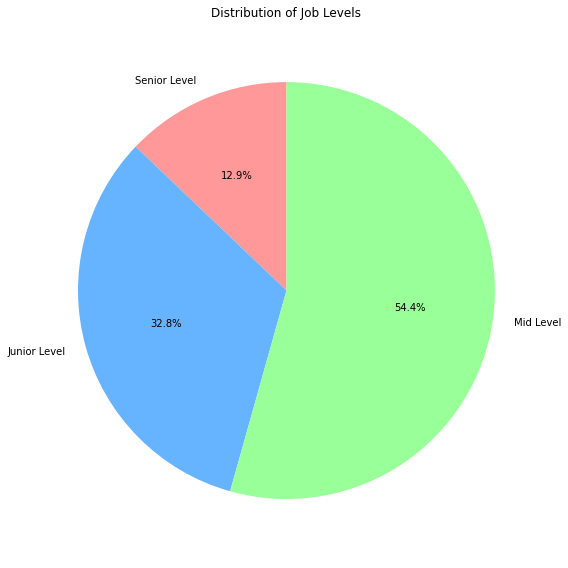

In [0]:
vis_job_level = job_listenings_df.groupBy('Job Level').count()

vis_job_level_pd = vis_job_level.toPandas()

custom_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0']
plt.figure(figsize=(8, 8))
plt.pie(
    vis_job_level_pd['count'],                     
    labels=vis_job_level_pd['Job Level'],           
    autopct='%1.1f%%',                             
    startangle=90,                                 
    colors=custom_colors                      
)

plt.title('Distribution of Job Levels')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [0]:
display(job_listenings_df.groupBy('Job Category', 'Job Level').agg(count('*').alias('Count')))

Job Category,Job Level,Count
Teaching,Senior Level,2
Healthcare,Junior Level,8
Other,Junior Level,9
Administrative & Support,Senior Level,3
Engineering and Construction,Junior Level,4
Legal,Mid Level,4
Teaching,Junior Level,8
Other,Senior Level,4
Administrative & Support,Junior Level,22
Sales and Marketing,Junior Level,35


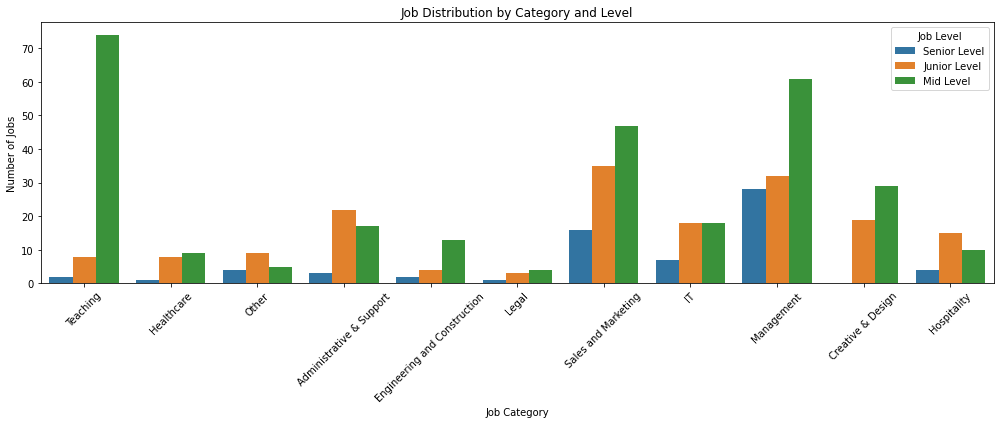

In [0]:
from pyspark.sql.functions import count
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group & aggregate
job_category_level = job_listenings_df.groupBy('Job Category', 'Job Level').agg(count('*').alias('Count'))

# Step 2: Convert to Pandas
job_category_level_pd = job_category_level.toPandas()

# Step 3: Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=job_category_level_pd, x='Job Category', y='Count', hue='Job Level')
plt.xticks(rotation=45)
plt.title('Job Distribution by Category and Level')
plt.xlabel('Job Category')
plt.ylabel('Number of Jobs')
plt.legend(title='Job Level')
plt.tight_layout()
plt.show()


In [0]:
display(job_listenings_df.groupBy('Job Category').agg(sum(col('No of Openings')).alias('Total No of Openings')).orderBy(col('Total No of Openings').desc()))

Job Category,Total No of Openings
Sales and Marketing,334.0
Management,193.0
Teaching,149.0
Administrative & Support,128.0
Other,97.0
IT,75.0
Creative & Design,67.0
Legal,57.0
Healthcare,46.0
Hospitality,41.0


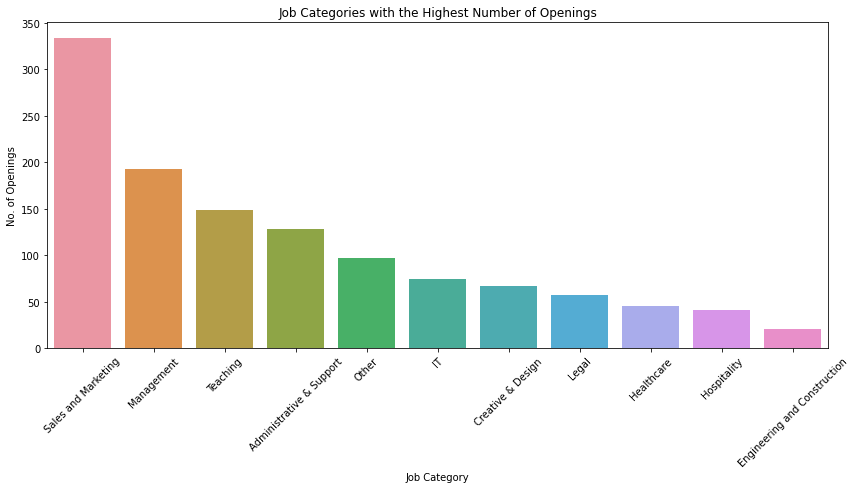

In [0]:
vis_Openings = job_listenings_df.groupBy('Job Category').agg(sum(col('No of Openings')).alias('Total No of Openings')).orderBy(col('Total No of Openings').desc())

vis_Openings_pd = vis_Openings.toPandas()

plt.figure(figsize=(14,6))
sns.barplot(data = vis_Openings_pd, x= 'Job Category' , y = 'Total No of Openings')
plt.title('Job Categories with the Highest Number of Openings')
plt.xticks(rotation=45)
plt.xlabel('Job Category')
plt.ylabel('No. of Openings')
plt.show()

In [0]:
display(job_listenings_df.groupBy('Standardized Location').count().orderBy(col('count').desc()).limit(10))

Standardized Location,count
Kathmandu,325
Nepal,82
Lalitpur,55
"Kathmandu, Bara",11
Bhaktapur,9
Pokhara,7
Chitwan,4
Makwanpur,3
Sarlahi,3
"Kathmandu, Bhaktapur",2


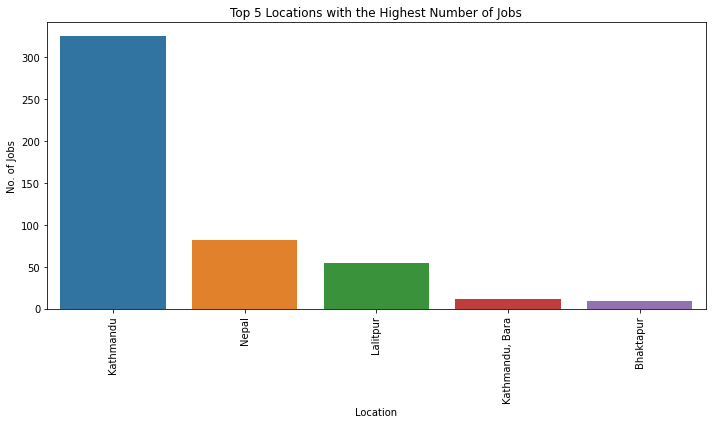

In [0]:
vis_location = job_listenings_df.groupBy('Standardized Location').count().orderBy(col('count').desc()).limit(5)

vis_locatio_pd = vis_location.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(data = vis_locatio_pd, x =  'Standardized Location', y = 'count')
plt.xticks(rotation= 90)
plt.title('Top 5 Locations with the Highest Number of Jobs')
plt.xlabel('Location')
plt.ylabel('No. of Jobs')
plt.tight_layout()
plt.show()

In [0]:
display(job_listenings_df.groupBy('Company').agg(sum(col('No of Openings')).alias('Total Openings')).orderBy(col('Total Openings').desc()).limit(10))

Company,Total Openings
Kalash Services Pvt. Ltd,50.0
Praramva World School and college,32.0
Entegra Sources,30.0
B & B Soft Tech Kathmandu,30.0
B. And B. Soft Tech Kathmandu,30.0
Machhapuchchhre School,25.0
Stepup Amigos,25.0
Elite Grand School,22.0
SG Design Nepal,20.0
Hubeirongyi,20.0


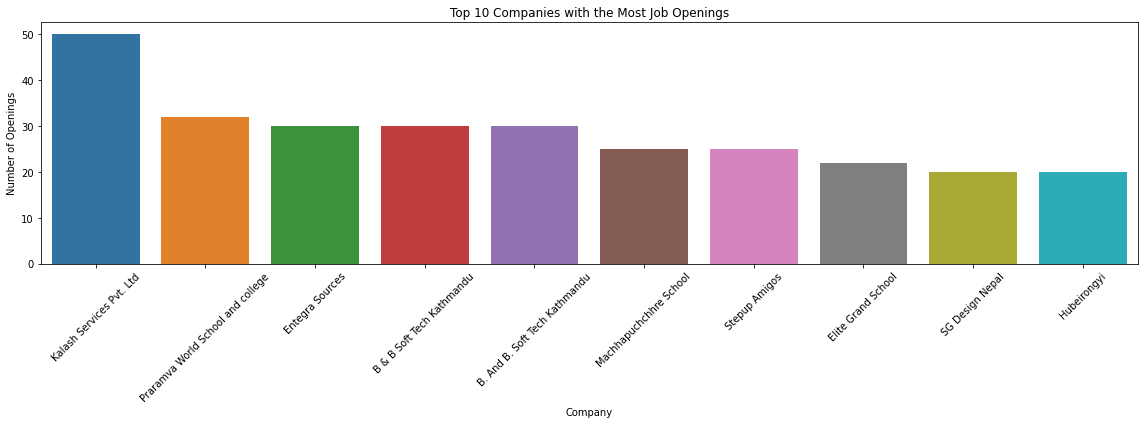

In [0]:
from pyspark.sql.functions import count, col, sum
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Company' and sum the 'No of Openings', sorting and limiting to top 5
vis_company = job_listenings_df.groupBy('Company').agg(sum(col('No of Openings')).alias('Total Openings')) \
    .orderBy(col('Total Openings').desc()).limit(10)

# Step 2: Convert to Pandas DataFrame
vis_company_pd = vis_company.toPandas()

# Step 3: Plot the data
plt.figure(figsize=(16, 6))
sns.barplot(data=vis_company_pd, x='Company', y='Total Openings')
plt.xlabel('Company')
plt.ylabel('Number of Openings')
plt.title('Top 10 Companies with the Most Job Openings')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

In [0]:
display(job_listenings_df.groupBy('salary_category').count())

salary_category,count
High,56
Very High,13
Low,11
Not disclosed,237
Medium,86
Negotiable,125


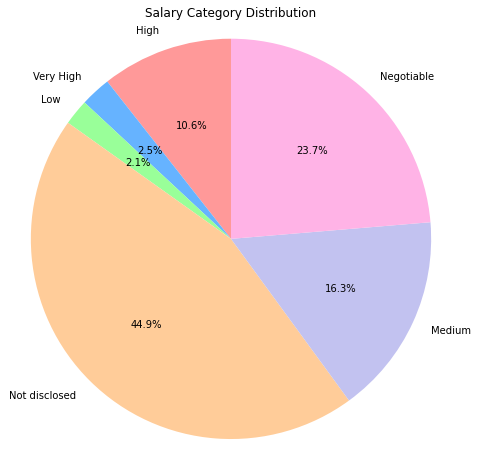

In [0]:
vis_salary = job_listenings_df.groupBy('salary_category').count()

# Convert to Pandas DataFrame
vis_salary_pd = vis_salary.toPandas()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    vis_salary_pd['count'], 
    labels=vis_salary_pd['salary_category'],
    autopct='%1.1f%%', 
    startangle=90,
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'], 
)
plt.title('Salary Category Distribution')
plt.axis('equal')  
plt.show()

In [0]:
display(job_listenings_df.groupBy('Job Category','salary_category').count())

Job Category,salary_category,count
Creative & Design,Not disclosed,15
IT,Low,2
Sales and Marketing,Not disclosed,33
Sales and Marketing,High,15
Legal,Negotiable,1
Administrative & Support,Very High,1
Creative & Design,Negotiable,17
Sales and Marketing,Low,3
Teaching,Not disclosed,51
Engineering and Construction,Medium,1


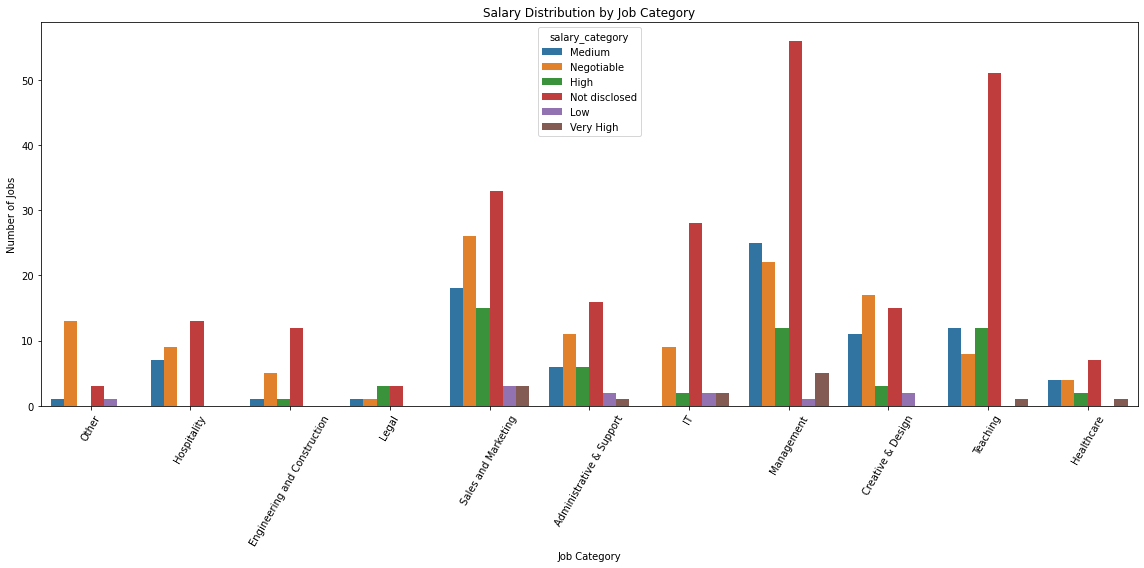

In [0]:
vis_salary_jobCategory = job_listenings_df.groupBy('salary_category', 'Job Category').count()

# Convert to Pandas DataFrame
vis_salary_jobCategory_pd = vis_salary_jobCategory.toPandas()

plt.figure(figsize=(16, 8))
sns.barplot(data=vis_salary_jobCategory_pd, x='Job Category', y='count', hue='salary_category')
plt.title('Salary Distribution by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Number of Jobs') 
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()
